In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()

%matplotlib inline

Checking Values:  log/test_models_full_results/noise_00_energy_00_separation_10.json 100
Checking Values:  log/test_models_full_results/noise_005_energy_00_separation_095.json 100
Checking Values:  log/test_models_full_results/noise_01_energy_00_separation_09.json 100
Checking Values:  log/test_models_full_results/noise_015_energy_00_separation_085.json 100
Checking Values:  log/test_models_full_results/noise_02_energy_00_separation_08.json 100
Checking Values:  log/test_models_full_results/noise_025_energy_00_separation_075.json 100
Checking Values:  log/test_models_full_results/noise_03_energy_00_separation_07.json 100
Checking Values:  log/test_models_full_results/noise_035_energy_00_separation_065.json 100
Checking Values:  log/test_models_full_results/noise_04_energy_00_separation_06.json 100
Checking Values:  log/test_models_full_results/noise_045_energy_00_separation_055.json 100
Checking Values:  log/test_models_full_results/noise_05_energy_00_separation_05.json 100


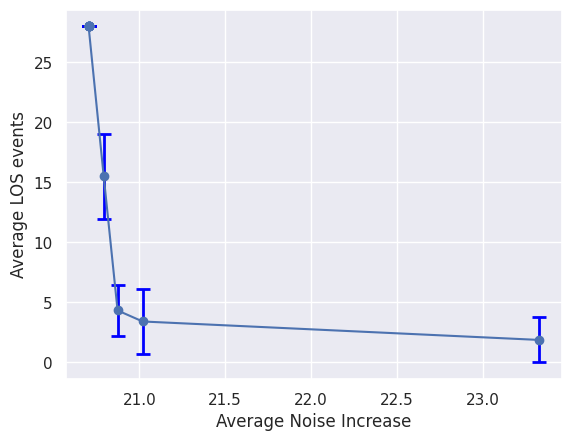

In [2]:
import matplotlib.pyplot as plt
import tikzplotlib
import json
import numpy as np

dict_of_data_points = {'log/test_models_full_results/noise_00_energy_00_separation_10.json': 0, 'log/test_models_full_results/noise_005_energy_00_separation_095.json': 0.05, 'log/test_models_full_results/noise_01_energy_00_separation_09.json': 0.1, 'log/test_models_full_results/noise_015_energy_00_separation_085.json': 0.15, 'log/test_models_full_results/noise_02_energy_00_separation_08.json': 0.2, 'log/test_models_full_results/noise_025_energy_00_separation_075.json': 0.25, 'log/test_models_full_results/noise_03_energy_00_separation_07.json': 0.3, 'log/test_models_full_results/noise_035_energy_00_separation_065.json': 0.35, 'log/test_models_full_results/noise_04_energy_00_separation_06.json': 0.4, 'log/test_models_full_results/noise_045_energy_00_separation_055.json': 0.45, 'log/test_models_full_results/noise_05_energy_00_separation_05.json': 0.5}
avg_los_dict = {}
std_dev_lost_dict = {}
noise_dict = {}
congestion_distribution = {}
for key in dict_of_data_points.keys():
    with open(key) as file:
        full_data = json.load(file)
    print("Checking Values: ", key, len(full_data))
    total_count_3000 = sum([full_data[i]['congestion_distribution']['3000'] for i in range(0, len(full_data))])
    total_count_all = sum([sum([full_data[i]['congestion_distribution'][key_2] for key_2 in full_data[i]['congestion_distribution']]) for i in range(0, len(full_data))]) 
    congestion_distribution[dict_of_data_points[key]] = total_count_3000 / total_count_all
    # congestion_distribution[dict_of_data_points[key]] = [full_data[i]['congestion_distribution']['3000'] / sum([full_data[i]['congestion_distribution'][key_2] for key_2 in full_data[i]['congestion_distribution']]) for i in range(0, len(full_data))]
    # print("Len: ", len(congestion_distribution))
    los_list = [full_data[i]['los'] for i in range (0, len(full_data))]
    avg_los_dict[dict_of_data_points[key]] = np.mean(los_list)
    std_dev_lost_dict[dict_of_data_points[key]] = np.std(los_list)
    noise_set = [entry['avg_noise'] for entry in full_data]
    noise_all_datapoints = [item for i in range(0, len(noise_set)) for item in noise_set[i].values()]
    noise_dict[dict_of_data_points[key]] = np.mean(noise_all_datapoints)
    # print("Len 2: ", len(noise_dict))

tradeoff_param = sorted(avg_los_dict.keys())
avg_los_vals = [avg_los_dict[param] for param in tradeoff_param]
std_los_vals = [std_dev_lost_dict[param] for param in tradeoff_param]
noise_vals = [noise_dict[param] for param in tradeoff_param]
congestion_vals = [congestion_distribution[param] for param in tradeoff_param]
# print(avg_los_vals)
# plt.figure(figsize=(8, 6))
# print(noise_vals)
plt.errorbar(noise_vals, avg_los_vals, yerr=std_los_vals, fmt='-o', label='Avg LOS with Std Dev', ecolor='blue', elinewidth=2, capsize=5, capthick=2)

plt.xlabel('Average Noise Increase')
plt.ylabel('Average LOS events')
plt.grid(True)
tikzplotlib.save("plot_results/tex_plots_noise_separation/tradeoff_plot_separation.tex")
plt.show()

Checking Values:  log/test_models_full_results/noise_00_energy_00_separation_10.json 100
Checking Values:  log/test_models_full_results/noise_005_energy_00_separation_095.json 100
Checking Values:  log/test_models_full_results/noise_01_energy_00_separation_09.json 100
Checking Values:  log/test_models_full_results/noise_015_energy_00_separation_085.json 100
Checking Values:  log/test_models_full_results/noise_02_energy_00_separation_08.json 100
Checking Values:  log/test_models_full_results/noise_025_energy_00_separation_075.json 100
Checking Values:  log/test_models_full_results/noise_03_energy_00_separation_07.json 100
Checking Values:  log/test_models_full_results/noise_035_energy_00_separation_065.json 100
Checking Values:  log/test_models_full_results/noise_04_energy_00_separation_06.json 100
Checking Values:  log/test_models_full_results/noise_045_energy_00_separation_055.json 100
Checking Values:  log/test_models_full_results/noise_05_energy_00_separation_05.json 100


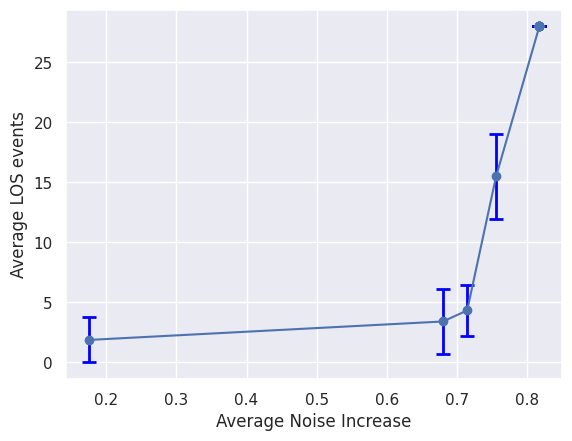

In [3]:
import matplotlib.pyplot as plt
import tikzplotlib
import json
import numpy as np

dict_of_data_points = {'log/test_models_full_results/noise_00_energy_00_separation_10.json': 0, 'log/test_models_full_results/noise_005_energy_00_separation_095.json': 0.05, 'log/test_models_full_results/noise_01_energy_00_separation_09.json': 0.1, 'log/test_models_full_results/noise_015_energy_00_separation_085.json': 0.15, 'log/test_models_full_results/noise_02_energy_00_separation_08.json': 0.2, 'log/test_models_full_results/noise_025_energy_00_separation_075.json': 0.25, 'log/test_models_full_results/noise_03_energy_00_separation_07.json': 0.3, 'log/test_models_full_results/noise_035_energy_00_separation_065.json': 0.35, 'log/test_models_full_results/noise_04_energy_00_separation_06.json': 0.4, 'log/test_models_full_results/noise_045_energy_00_separation_055.json': 0.45, 'log/test_models_full_results/noise_05_energy_00_separation_05.json': 0.5}
avg_los_dict = {}
std_dev_lost_dict = {}
noise_dict = {}
congestion_distribution = {}
for key in dict_of_data_points.keys():
    with open(key) as file:
        full_data = json.load(file)
    print("Checking Values: ", key, len(full_data))
    total_count_3000 = sum([full_data[i]['congestion_distribution']['3000'] for i in range(0, len(full_data))])
    total_count_all = sum([sum([full_data[i]['congestion_distribution'][key_2] for key_2 in full_data[i]['congestion_distribution']]) for i in range(0, len(full_data))]) 
    congestion_distribution[dict_of_data_points[key]] = total_count_3000 / total_count_all
    # congestion_distribution[dict_of_data_points[key]] = [full_data[i]['congestion_distribution']['3000'] / sum([full_data[i]['congestion_distribution'][key_2] for key_2 in full_data[i]['congestion_distribution']]) for i in range(0, len(full_data))]
    # print("Len: ", len(congestion_distribution))
    los_list = [full_data[i]['los'] for i in range (0, len(full_data))]
    avg_los_dict[dict_of_data_points[key]] = np.mean(los_list)
    std_dev_lost_dict[dict_of_data_points[key]] = np.std(los_list)
    noise_set = [entry['avg_noise'] for entry in full_data]
    noise_all_datapoints = [item for i in range(0, len(noise_set)) for item in noise_set[i].values()]
    noise_dict[dict_of_data_points[key]] = np.mean(noise_all_datapoints)
    # print("Len 2: ", len(noise_dict))

tradeoff_param = sorted(avg_los_dict.keys())
avg_los_vals = [avg_los_dict[param] for param in tradeoff_param]
std_los_vals = [std_dev_lost_dict[param] for param in tradeoff_param]
noise_vals = [noise_dict[param] for param in tradeoff_param]
congestion_vals = [congestion_distribution[param] for param in tradeoff_param]
# print(avg_los_vals)
# plt.figure(figsize=(8, 6))
# print(noise_vals)
plt.errorbar(congestion_vals, avg_los_vals, yerr=std_los_vals, fmt='-o', label='Avg LOS with Std Dev', ecolor='blue', elinewidth=2, capsize=5, capthick=2)

plt.xlabel('Average Noise Increase')
plt.ylabel('Average LOS events')
plt.grid(True)
tikzplotlib.save("plot_results/tex_plots_noise_separation/tradeoff_plot_congestion.tex")
plt.show()

Alt Change Dict:  {0.0: 0.0006617647058823529, 0.025: 0.0011029411764705882, 0.05: 0.026544117647058822, 0.075: 2.0294117647058822, 0.1: 2.0741911764705883, 0.125: 2.9324264705882355, 0.15: 4.0, 0.175: 4.001470588235295, 1.0: 4.000147058823529}
Noise Dict:  {0.0: 26.899588279344837, 0.025: 26.899512309026125, 0.05: 26.8959457867238, 0.075: 23.03388428370223, 0.1: 23.037452452848765, 0.125: 22.19557505019131, 0.15: 20.746784072000022, 0.175: 20.727668925645325, 1.0: 20.74721943666157}


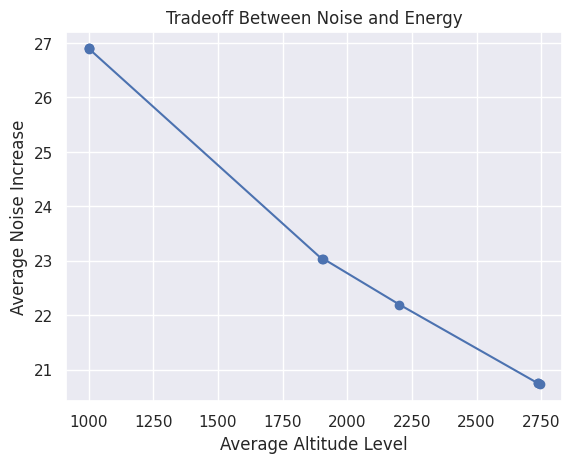

In [4]:
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np
import json

# Driver.weights_file = ['models/train_D2MAV_energy_and_noise/noise_019_energy_081_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_018_energy_082_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_017_energy_083_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_016_energy_084_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_015_energy_085_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_014_energy_086_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_013_energy_087_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_012_energy_088_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_011_energy_089_separation_0/best_model.h5']

dict_of_data_points = {'log/test_models_full_results/noise_00_energy_10_separation_00.json': 0.0, 'log/test_models_full_results/noise_0025_energy_0975_separation_00.json': 0.025, 'log/test_models_full_results/noise_005_energy_095_separation_00.json' : 0.05, 'log/test_models_full_results/noise_0075_energy_0925_separation_00.json' : 0.075, 'log/test_models_full_results/noise_01_energy_09_separation_00.json': 0.1, 'log/test_models_full_results/noise_0125_energy_0875_separation_00.json' : 0.125, 'log/test_models_full_results/noise_015_energy_085_separation_00.json' : 0.15,  'log/test_models_full_results/noise_0175_energy_0825_separation_00.json' : 0.175,'log/test_models_full_results/noise_10_energy_00_separation_00.json' : 1.0} # 'log/test_models_full_results/noise_0175_energy_0825_separation_00.json' : 0.175, 'log/test_models_full_results/noise_02_energy_08_separation_00.json' : 0.2, 'log/test_models_full_results/noise_03_energy_07_separation_00.json' : 0.3}
avg_los_dict = {}
std_dev_lost_dict = {}
noise_dict = {}
alt_change_dict = {}
alt_level_dict = {}
for key in dict_of_data_points.keys():
    with open(key) as file:
        # print(key)
        full_data = json.load(file)

    
    los_list = [full_data[i]['los'] for i in range (0, len(full_data))]
    
    avg_los_dict[dict_of_data_points[key]] = np.mean(los_list)
    std_dev_lost_dict[dict_of_data_points[key]] = np.std(los_list)
    noise_set = [entry['avg_noise'] for entry in full_data]
    
    noise_all_datapoints = [item for i in range(0, len(noise_set)) for item in noise_set[i].values()]
    noise_dict[dict_of_data_points[key]] = np.mean(noise_all_datapoints)

    alt_set = [entry['num_alt_adjustments'] for entry in full_data]
    alt_all_datapoints = [item for i in range(0, len(alt_set)) for item in alt_set[i].values()]
    alt_change_dict[dict_of_data_points[key]] = np.mean(alt_all_datapoints)
    conjestion_data = [entry['congestion_distribution'] for entry in full_data]
    total_weighted_altitude = 0
    total_count = 0

    for dist in conjestion_data:
        for altitude_str, count in dist.items():
            altitude = int(altitude_str)
            if altitude >= 1000:
                total_weighted_altitude += altitude * count
                total_count += count

    average_altitude = total_weighted_altitude / total_count if total_count > 0 else 0
    alt_level_dict[dict_of_data_points[key]] = average_altitude



tradeoff_param = sorted(avg_los_dict.keys())
avg_los_vals = [avg_los_dict[param] for param in tradeoff_param]
std_los_vals = [std_dev_lost_dict[param] for param in tradeoff_param]
noise_vals = [noise_dict[param] for param in tradeoff_param]
alt_change_values = [alt_level_dict[param] for param in tradeoff_param]
print("Alt Change Dict: ", alt_change_dict)
print("Noise Dict: ", noise_dict)
# plt.figure(figsize=(8, 6))
plt.errorbar(alt_change_values, noise_vals, fmt='-o', label='Avg LOS with Std Dev', ecolor='blue', elinewidth=2, capsize=5, capthick=2)

# for i, param in enumerate(tradeoff_param):
#     plt.text(noise_vals[i] + 0.1, avg_los_vals[i], f'{param}', fontsize=9, ha='left', va='center')

plt.xlabel('Average Altitude Level')
plt.ylabel('Average Noise Increase')
plt.title('Tradeoff Between Noise and Energy')
plt.grid(True)
tikzplotlib.save("plot_results/tex_plots_energy_noise/tradeoff_plot_altitude_levels.tex")
# tikzplotlib.save("tradeoff_plot_2.tex")
plt.show()

Alt Change Dict:  {0.0: 0.0006617647058823529, 0.025: 0.0011029411764705882, 0.05: 0.026544117647058822, 0.075: 2.0294117647058822, 0.1: 2.0741911764705883, 0.125: 2.9324264705882355, 0.15: 4.0, 0.175: 4.001470588235295, 1.0: 4.000147058823529}
Noise Dict:  {0.0: 26.899588279344837, 0.025: 26.899512309026125, 0.05: 26.8959457867238, 0.075: 23.03388428370223, 0.1: 23.037452452848765, 0.125: 22.19557505019131, 0.15: 20.746784072000022, 0.175: 20.727668925645325, 1.0: 20.74721943666157}


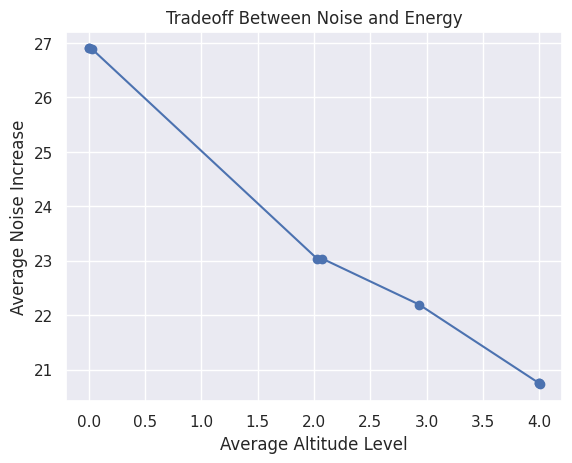

In [5]:
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np
import json

# Driver.weights_file = ['models/train_D2MAV_energy_and_noise/noise_019_energy_081_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_018_energy_082_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_017_energy_083_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_016_energy_084_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_015_energy_085_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_014_energy_086_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_013_energy_087_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_012_energy_088_separation_0/best_model.h5', 'models/train_D2MAV_energy_and_noise/noise_011_energy_089_separation_0/best_model.h5']

dict_of_data_points = {'log/test_models_full_results/noise_00_energy_10_separation_00.json': 0.0, 'log/test_models_full_results/noise_0025_energy_0975_separation_00.json': 0.025, 'log/test_models_full_results/noise_005_energy_095_separation_00.json' : 0.05, 'log/test_models_full_results/noise_0075_energy_0925_separation_00.json' : 0.075, 'log/test_models_full_results/noise_01_energy_09_separation_00.json': 0.1, 'log/test_models_full_results/noise_0125_energy_0875_separation_00.json' : 0.125, 'log/test_models_full_results/noise_015_energy_085_separation_00.json' : 0.15,  'log/test_models_full_results/noise_0175_energy_0825_separation_00.json' : 0.175,'log/test_models_full_results/noise_10_energy_00_separation_00.json' : 1.0} # 'log/test_models_full_results/noise_0175_energy_0825_separation_00.json' : 0.175, 'log/test_models_full_results/noise_02_energy_08_separation_00.json' : 0.2, 'log/test_models_full_results/noise_03_energy_07_separation_00.json' : 0.3}
avg_los_dict = {}
std_dev_lost_dict = {}
noise_dict = {}
alt_change_dict = {}
alt_level_dict = {}
for key in dict_of_data_points.keys():
    with open(key) as file:
        # print(key)
        full_data = json.load(file)

    
    los_list = [full_data[i]['los'] for i in range (0, len(full_data))]
    
    avg_los_dict[dict_of_data_points[key]] = np.mean(los_list)
    std_dev_lost_dict[dict_of_data_points[key]] = np.std(los_list)
    noise_set = [entry['avg_noise'] for entry in full_data]
    
    noise_all_datapoints = [item for i in range(0, len(noise_set)) for item in noise_set[i].values()]
    noise_dict[dict_of_data_points[key]] = np.mean(noise_all_datapoints)

    alt_set = [entry['num_alt_adjustments'] for entry in full_data]
    alt_all_datapoints = [item for i in range(0, len(alt_set)) for item in alt_set[i].values()]
    alt_change_dict[dict_of_data_points[key]] = np.mean(alt_all_datapoints)
    conjestion_data = [entry['congestion_distribution'] for entry in full_data]
    total_weighted_altitude = 0
    total_count = 0

    for dist in conjestion_data:
        for altitude_str, count in dist.items():
            altitude = int(altitude_str)
            if altitude >= 1000:
                total_weighted_altitude += altitude * count
                total_count += count

    average_altitude = total_weighted_altitude / total_count if total_count > 0 else 0
    alt_level_dict[dict_of_data_points[key]] = average_altitude



tradeoff_param = sorted(avg_los_dict.keys())
avg_los_vals = [avg_los_dict[param] for param in tradeoff_param]
std_los_vals = [std_dev_lost_dict[param] for param in tradeoff_param]
noise_vals = [noise_dict[param] for param in tradeoff_param]
alt_change_values = [alt_change_dict[param] for param in tradeoff_param]
print("Alt Change Dict: ", alt_change_dict)
print("Noise Dict: ", noise_dict)
# plt.figure(figsize=(8, 6))
plt.errorbar(alt_change_values, noise_vals, fmt='-o', label='Avg LOS with Std Dev', ecolor='blue', elinewidth=2, capsize=5, capthick=2)

# for i, param in enumerate(tradeoff_param):
#     plt.text(noise_vals[i] + 0.1, avg_los_vals[i], f'{param}', fontsize=9, ha='left', va='center')

plt.xlabel('Average Altitude Level')
plt.ylabel('Average Noise Increase')
plt.title('Tradeoff Between Noise and Energy')
plt.grid(True)
tikzplotlib.save("plot_results/tex_plots_energy_noise/tradeoff_plot_altitude_increases.tex")
# tikzplotlib.save("tradeoff_plot_2.tex")
plt.show()

LOS Dict:  {0.0: 1.86, 0.05: 1.63, 0.1: 1.86, 0.15: 2.4, 0.2: 1.28, 0.25: 2.2, 0.3: 17.84, 0.4: 17.9, 0.45: 17.928571428571427}
Noise Dict:  {0.0: 18.310220588235293, 0.05: 2.5776470588235294, 0.1: 2.5710294117647057, 0.15: 1.8125735294117646, 0.2: 2.2663235294117645, 0.25: 1.8130882352941176, 0.3: 0.1200735294117647, 0.4: 0.09801470588235293, 0.45: 0.029936974789915968}


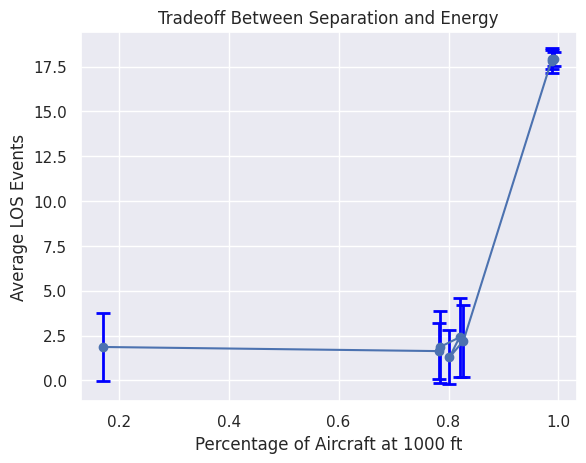

In [6]:
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np
import json

dict_of_data_points = {
    'log/test_models_full_results/noise_00_energy_00_separation_10.json': 0.0,
    'log/test_models_full_results/noise_00_energy_005_separation_095.json': 0.05,
    'log/test_models_full_results/noise_00_energy_01_separation_09.json': 0.1,
    'log/test_models_full_results/noise_00_energy_015_separation_085.json': 0.15,
    'log/test_models_full_results/noise_00_energy_02_separation_08.json': 0.2,
    'log/test_models_full_results/noise_00_energy_025_separation_075.json': 0.25,
    'log/test_models_full_results/noise_00_energy_03_separation_07.json': 0.3,
    'log/test_models_full_results/noise_00_energy_04_separation_06.json': 0.35,
    'log/test_models_full_results/noise_00_energy_04_separation_06.json': 0.4,
    'log/test_models_full_results/noise_00_energy_045_separation_055.json': 0.45,
}
avg_los_dict = {}
std_dev_lost_dict = {}
noise_dict = {}
alt_change_dict = {}
for key in dict_of_data_points.keys():
    with open(key) as file:
        full_data = json.load(file)

    
    los_list = [full_data[i]['los'] for i in range (0, len(full_data))]
    
    avg_los_dict[dict_of_data_points[key]] = np.mean(los_list)
    std_dev_lost_dict[dict_of_data_points[key]] = np.std(los_list)
    noise_set = [entry['avg_noise'] for entry in full_data]

    total_count_1000 = sum([full_data[i]['congestion_distribution']['1000'] for i in range(0, len(full_data))])
    total_count_all = sum([sum([full_data[i]['congestion_distribution'][key_2] for key_2 in full_data[i]['congestion_distribution']]) for i in range(0, len(full_data))]) 
    congestion_distribution[dict_of_data_points[key]] = total_count_1000 / total_count_all

    noise_all_datapoints = [item for i in range(0, len(noise_set)) for item in noise_set[i].values()]
    noise_dict[dict_of_data_points[key]] = np.mean(noise_all_datapoints)

    alt_set = [entry['num_alt_adjustments'] for entry in full_data]
    alt_all_datapoints = [item for i in range(0, len(alt_set)) for item in alt_set[i].values()]
    alt_change_dict[dict_of_data_points[key]] = np.mean(alt_all_datapoints)

tradeoff_param = sorted(avg_los_dict.keys())
avg_los_vals = [avg_los_dict[param] for param in tradeoff_param]
std_los_vals = [std_dev_lost_dict[param] for param in tradeoff_param]
noise_vals = [noise_dict[param] for param in tradeoff_param]
alt_change_values = [congestion_distribution[param] for param in tradeoff_param]
print("LOS Dict: ", avg_los_dict)
print("Noise Dict: ", alt_change_dict)
plt.errorbar(alt_change_values, avg_los_vals, yerr=std_los_vals, fmt='-o', label='Avg LOS with Std Dev', ecolor='blue', elinewidth=2, capsize=5, capthick=2)

# plt.legend()
plt.xlabel('Percentage of Aircraft at 1000 ft')
plt.ylabel('Average LOS Events')
plt.title('Tradeoff Between Separation and Energy')
plt.grid(True)
tikzplotlib.save("plot_results/tex_plots_energy_separation/tradeoff_plot_energy_congestion.tex")
plt.show()

LOS Dict:  {0.0: 1.86, 0.05: 1.63, 0.1: 1.86, 0.15: 2.4, 0.2: 1.28, 0.25: 2.2, 0.3: 17.84, 0.4: 17.9, 0.45: 17.928571428571427}
Noise Dict:  {0.0: 18.310220588235293, 0.05: 2.5776470588235294, 0.1: 2.5710294117647057, 0.15: 1.8125735294117646, 0.2: 2.2663235294117645, 0.25: 1.8130882352941176, 0.3: 0.1200735294117647, 0.4: 0.09801470588235293, 0.45: 0.029936974789915968}


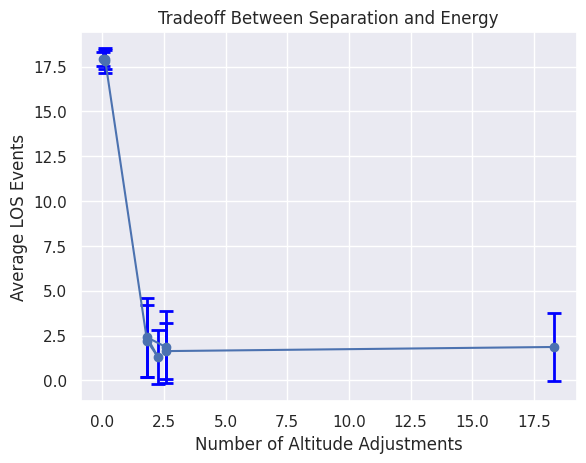

In [7]:
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np
import json

dict_of_data_points = {
    'log/test_models_full_results/noise_00_energy_00_separation_10.json': 0.0,
    'log/test_models_full_results/noise_00_energy_005_separation_095.json': 0.05,
    'log/test_models_full_results/noise_00_energy_01_separation_09.json': 0.1,
    'log/test_models_full_results/noise_00_energy_015_separation_085.json': 0.15,
    'log/test_models_full_results/noise_00_energy_02_separation_08.json': 0.2,
    'log/test_models_full_results/noise_00_energy_025_separation_075.json': 0.25,
    'log/test_models_full_results/noise_00_energy_03_separation_07.json': 0.3,
    'log/test_models_full_results/noise_00_energy_04_separation_06.json': 0.35,
    'log/test_models_full_results/noise_00_energy_04_separation_06.json': 0.4,
    'log/test_models_full_results/noise_00_energy_045_separation_055.json': 0.45,
}
avg_los_dict = {}
std_dev_lost_dict = {}
noise_dict = {}
alt_change_dict = {}
for key in dict_of_data_points.keys():
    with open(key) as file:
        full_data = json.load(file)

    
    los_list = [full_data[i]['los'] for i in range (0, len(full_data))]
    
    avg_los_dict[dict_of_data_points[key]] = np.mean(los_list)
    std_dev_lost_dict[dict_of_data_points[key]] = np.std(los_list)
    noise_set = [entry['avg_noise'] for entry in full_data]

    total_count_1000 = sum([full_data[i]['congestion_distribution']['1000'] for i in range(0, len(full_data))])
    total_count_all = sum([sum([full_data[i]['congestion_distribution'][key_2] for key_2 in full_data[i]['congestion_distribution']]) for i in range(0, len(full_data))]) 
    congestion_distribution[dict_of_data_points[key]] = total_count_1000 / total_count_all

    noise_all_datapoints = [item for i in range(0, len(noise_set)) for item in noise_set[i].values()]
    noise_dict[dict_of_data_points[key]] = np.mean(noise_all_datapoints)

    alt_set = [entry['num_alt_adjustments'] for entry in full_data]
    alt_all_datapoints = [item for i in range(0, len(alt_set)) for item in alt_set[i].values()]
    alt_change_dict[dict_of_data_points[key]] = np.mean(alt_all_datapoints)

tradeoff_param = sorted(avg_los_dict.keys())
avg_los_vals = [avg_los_dict[param] for param in tradeoff_param]
std_los_vals = [std_dev_lost_dict[param] for param in tradeoff_param]
noise_vals = [noise_dict[param] for param in tradeoff_param]
alt_change_values = [alt_change_dict[param] for param in tradeoff_param]
print("LOS Dict: ", avg_los_dict)
print("Noise Dict: ", alt_change_dict)
plt.errorbar(alt_change_values, avg_los_vals, yerr=std_los_vals, fmt='-o', label='Avg LOS with Std Dev', ecolor='blue', elinewidth=2, capsize=5, capthick=2)

# plt.legend()
plt.xlabel('Number of Altitude Adjustments')
plt.ylabel('Average LOS Events')
plt.title('Tradeoff Between Separation and Energy')
plt.grid(True)
tikzplotlib.save("plot_results/tex_plots_energy_separation/tradeoff_plot_energy_separation.tex")
plt.show()

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
import numpy as np
import pandas as pd
import plotly.graph_objs as go

# === FILE GROUPS ===
noise_separation_files = {
    'log/test_models_full_results/noise_00_energy_00_separation_10.json': 0,
    'log/test_models_full_results/noise_005_energy_00_separation_095.json': 0.05,
    'log/test_models_full_results/noise_01_energy_00_separation_09.json': 0.1,
    'log/test_models_full_results/noise_015_energy_00_separation_085.json': 0.15,
    'log/test_models_full_results/noise_02_energy_00_separation_08.json': 0.2,
    'log/test_models_full_results/noise_025_energy_00_separation_075.json': 0.25,
    'log/test_models_full_results/noise_03_energy_00_separation_07.json': 0.3,
    'log/test_models_full_results/noise_035_energy_00_separation_065.json': 0.35,
    'log/test_models_full_results/noise_04_energy_00_separation_06.json': 0.4,
    'log/test_models_full_results/noise_045_energy_00_separation_055.json': 0.45,
    'log/test_models_full_results/noise_05_energy_00_separation_05.json': 0.5,
    'log/test_models_full_results/noise_10_energy_00_separation_00.json': 1.0
}

noise_energy_files = {
    'log/test_models_full_results/noise_00_energy_10_separation_00.json': 0.0,
    'log/test_models_full_results/noise_0025_energy_0975_separation_00.json': 0.025,
    'log/test_models_full_results/noise_005_energy_095_separation_00.json': 0.05,
    'log/test_models_full_results/noise_0075_energy_0925_separation_00.json': 0.075,
    'log/test_models_full_results/noise_01_energy_09_separation_00.json': 0.1,
    'log/test_models_full_results/noise_0125_energy_0875_separation_00.json': 0.125,
    'log/test_models_full_results/noise_015_energy_085_separation_00.json': 0.15,
    'log/test_models_full_results/noise_0175_energy_0825_separation_00.json': 0.175,
    'log/test_models_full_results/noise_02_energy_08_separation_00.json': 0.2,
    'log/test_models_full_results/noise_03_energy_07_separation_00.json': 0.3,
    'log/test_models_full_results/noise_10_energy_00_separation_00.json': 1.0
}

energy_separation_files = {
    'log/test_models_full_results/noise_00_energy_00_separation_10.json': 0.0,
    'log/test_models_full_results/noise_00_energy_005_separation_095.json': 0.05,
    'log/test_models_full_results/noise_00_energy_01_separation_09.json': 0.1,
    'log/test_models_full_results/noise_00_energy_015_separation_085.json': 0.15,
    'log/test_models_full_results/noise_00_energy_02_separation_08.json': 0.2,
    'log/test_models_full_results/noise_00_energy_025_separation_075.json': 0.25,
    'log/test_models_full_results/noise_00_energy_03_separation_07.json': 0.3,
    'log/test_models_full_results/noise_00_energy_04_separation_06.json': 0.35,
    'log/test_models_full_results/noise_00_energy_04_separation_06.json': 0.4,
    'log/test_models_full_results/noise_00_energy_045_separation_055.json': 0.45
}

# === Helper to extract consistent metrics ===
def extract_metrics(file_path):
    with open(file_path) as f:
        data = json.load(f)

    los_list = [entry['los'] for entry in data]
    noise_vals = [v for entry in data for v in entry['avg_noise'].values()]
    alt_adj_vals = [v for entry in data for v in entry['num_alt_adjustments'].values()]

    return (
        np.mean(noise_vals),
        np.mean(los_list),
        np.mean(alt_adj_vals)
    )

# === Gather all points ===
points = []
anchor_points = {}

for file_dict, label in zip(
    [noise_separation_files, noise_energy_files, energy_separation_files],
    ["Noise–Separation", "Noise–Energy", "Energy–Separation"]
):
    for path in file_dict:
        try:
            noise, los, energy = extract_metrics(path)
            is_anchor = (
                "noise_10_energy_00_separation_00" in path or
                "noise_00_energy_10_separation_00" in path or
                "noise_00_energy_00_separation_10" in path
            )
            if is_anchor:
                if "separation_10" in path:
                    anchor_points["Separation Only"] = (noise, los, energy)
                elif "noise_10" in path:
                    anchor_points["Noise Only"] = (noise, los, energy)
                elif "energy_10" in path:
                    anchor_points["Energy Only"] = (noise, los, energy)
            else:
                points.append({
                    "noise": noise,
                    "los": los,
                    "energy": energy,
                    "label": label
                })
        except Exception as e:
            print(f"Error processing {path}: {e}")

# === Convert to DataFrame ===
df = pd.DataFrame(points)
color_map = {
    "Noise–Separation": "blue",
    "Noise–Energy": "green",
    "Energy–Separation": "red"
}
df['color'] = df['label'].map(color_map)

# === Create Plotly 3D Scatter Plot ===
fig = go.Figure()

# Add the multi-objective tradeoff points
for label in df['label'].unique():
    subset = df[df['label'] == label]
    fig.add_trace(go.Scatter3d(
        x=subset['noise'],
        y=subset['los'],
        z=subset['energy'],
        mode='markers',
        marker=dict(size=5, color=subset['color'].iloc[0]),
        name=label
    ))

# Add single-objective anchor points
anchor_marker_map = {
    "Separation Only": ("circle", "purple"),
    "Noise Only": ("square", "orange"),
    "Energy Only": ("diamond", "black")
}

for name, (x, y, z) in anchor_points.items():
    symbol, color = anchor_marker_map[name]
    fig.add_trace(go.Scatter3d(
        x=[x],
        y=[y],
        z=[z],
        mode='markers+text',
        marker=dict(size=9, color=color, symbol=symbol),
        text=[name],
        textposition="top center",
        name=name
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='Average Noise',
        yaxis_title='Average LOS',
        zaxis_title='Avg Altitude Adjustments'
    ),
    title="3D Tradeoff Between Noise, LOS, and Energy (with Anchor Points)",
    legend_title="Tradeoff Source",
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()

/tmp/ipykernel_1834162/530048387.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




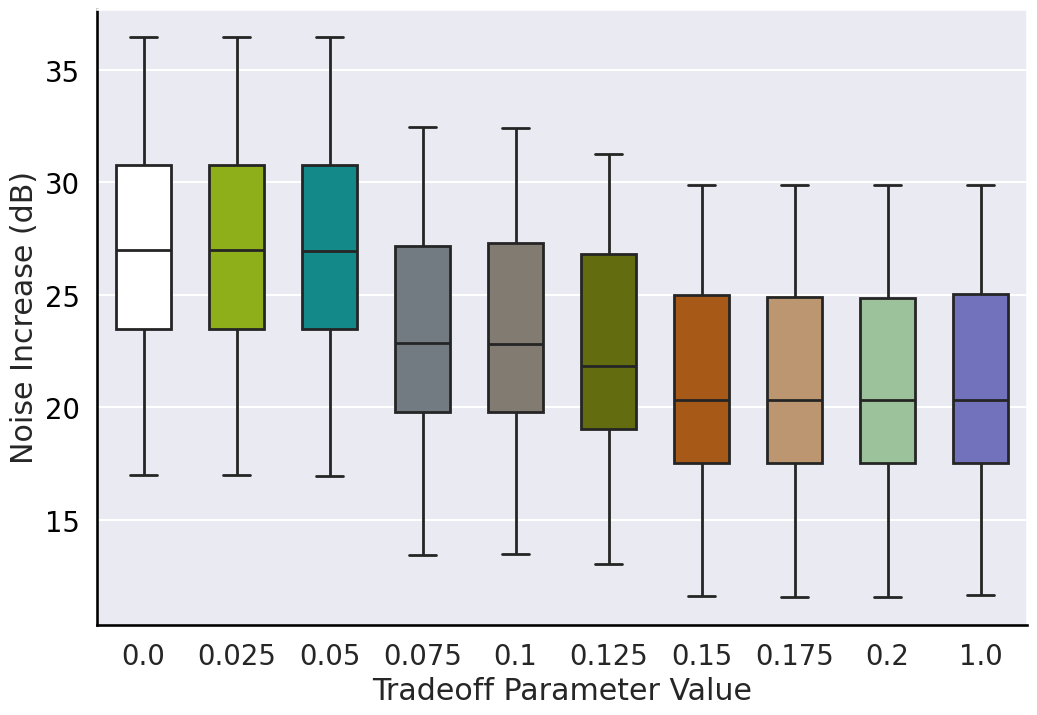

In [9]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np
dict_of_data_points = {'log/test_models_full_results/noise_00_energy_10_separation_00.json': 0.0, 'log/test_models_full_results/noise_0025_energy_0975_separation_00.json': 0.025, 'log/test_models_full_results/noise_005_energy_095_separation_00.json' : 0.05, 'log/test_models_full_results/noise_0075_energy_0925_separation_00.json' : 0.075, 'log/test_models_full_results/noise_01_energy_09_separation_00.json': 0.1, 'log/test_models_full_results/noise_0125_energy_0875_separation_00.json' : 0.125, 'log/test_models_full_results/noise_015_energy_085_separation_00.json' : 0.15, 'log/test_models_full_results/noise_0175_energy_0825_separation_00.json' : 0.175, 'log/test_models_full_results/noise_02_energy_08_separation_00.json' : 0.2, 'log/test_models_full_results/noise_10_energy_00_separation_00.json' : 1.0}

palette = {
    '0.0': (255 / 255, 255 / 255, 255 / 255),
    '0.025': (156 / 255, 200 / 255, 0 / 255),
    '0.05': (0 / 255, 156 / 255, 156 / 255),
    '0.075': (111 / 255, 123 / 255, 132 / 255),
    '0.1': (132 / 255, 123 / 255, 111 / 255),
    '0.125': (111 / 255, 123 / 255, 0 / 255),
    '0.15': (191 / 255, 87 / 255, 0 / 255),
    '0.175': (200 / 255, 150 / 255, 100 / 255),
    '0.2': (150 / 255, 200 / 255, 150 / 255),
    '1.0': (100 / 255, 100 / 255, 200 / 255),
}

# List to hold all the data for each category
all_data = []

# Iterate over the dictionary keys
for key in dict_of_data_points.keys():
    with open(key) as file:
        full_data = json.load(file)
    
    # Extract the 'avg_noise' values
    avg_noise_inc = [entry['avg_noise'] for entry in full_data]
    noise_histogram = [item for i in range(len(avg_noise_inc)) for item in avg_noise_inc[i].values()]

    # Append the data for the current key to the all_data list
    for value in noise_histogram:
        all_data.append({'Category': dict_of_data_points[key], 'Value': value})

# Create a DataFrame from the accumulated data
data = pd.DataFrame(all_data)

# Set the context for larger fonts
sns.set_context("talk", font_scale=1.2)

# Create the figure
plt.figure(figsize=(12, 8))

# Create a box plot with all categories side-by-side
sns.boxplot(x='Category', y='Value', data=data, whis=np.inf, linewidth=2, palette=palette, width=0.6)

# Add title and labels
plt.xlabel('Tradeoff Parameter Value')
plt.ylabel('Noise Increase (dB)')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.yticks(color='black')

# Save and show the plot
tikzplotlib.save("plot_results/box_plots/noise_energy_box_plot.tex")
plt.show()

/tmp/ipykernel_1834162/4230440853.py:49: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




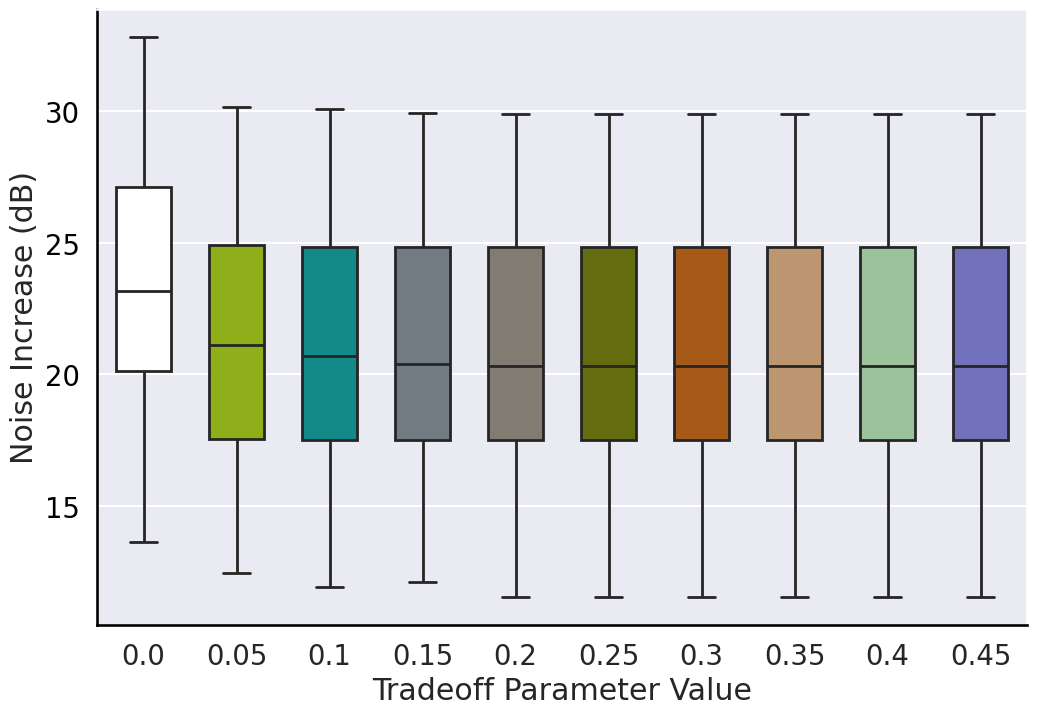

In [10]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np
dict_of_data_points = {'log/test_models_full_results/noise_00_energy_00_separation_10.json': 0, 'log/test_models_full_results/noise_005_energy_00_separation_095.json': 0.05, 'log/test_models_full_results/noise_01_energy_00_separation_09.json': 0.1, 'log/test_models_full_results/noise_015_energy_00_separation_085.json': 0.15, 'log/test_models_full_results/noise_02_energy_00_separation_08.json': 0.2, 'log/test_models_full_results/noise_025_energy_00_separation_075.json': 0.25, 'log/test_models_full_results/noise_03_energy_00_separation_07.json': 0.3, 'log/test_models_full_results/noise_035_energy_00_separation_065.json': 0.35, 'log/test_models_full_results/noise_04_energy_00_separation_06.json': 0.4, 'log/test_models_full_results/noise_045_energy_00_separation_055.json': 0.45}
# dict_of_data_points = {'098': 0.98, '005': 0.05, '01': 0.1, '019': 0.19, '018': 0.18, '017': 0.17, '016': 0.16, '014': 0.14, '013': 0.13, '012': 0.12, '011': 0.11}
palette = {
    '0.0': (255 / 255, 255 / 255, 255 / 255),
    '0.05': (156 / 255, 200 / 255, 0 / 255),
    '0.1': (0 / 255, 156 / 255, 156 / 255),
    '0.15': (111 / 255, 123 / 255, 132 / 255),
    '0.2': (132 / 255, 123 / 255, 111 / 255),
    '0.25': (111 / 255, 123 / 255, 0 / 255),
    '0.3': (191 / 255, 87 / 255, 0 / 255),
    '0.35': (200 / 255, 150 / 255, 100 / 255),
    '0.4': (150 / 255, 200 / 255, 150 / 255),
    '0.45': (100 / 255, 100 / 255, 200 / 255),
    '0.5': (100 / 255, 100 / 255, 200 / 255),
}

# List to hold all the data for each category
all_data = []

# Iterate over the dictionary keys
for key in dict_of_data_points.keys():
    with open(key) as file:
        full_data = json.load(file)
    
    # Extract the 'avg_noise' values
    avg_noise_inc = [entry['avg_noise'] for entry in full_data]
    noise_histogram = [item for i in range(len(avg_noise_inc)) for item in avg_noise_inc[i].values()]

    # Append the data for the current key to the all_data list
    for value in noise_histogram:
        all_data.append({'Category': dict_of_data_points[key], 'Value': value})

# Create a DataFrame from the accumulated data
data = pd.DataFrame(all_data)

# Set the context for larger fonts
sns.set_context("talk", font_scale=1.2)

# Create the figure
plt.figure(figsize=(12, 8))

# Create a box plot with all categories side-by-side
sns.boxplot(x='Category', y='Value', data=data, whis=np.inf, linewidth=2, palette=palette, width=0.6)

# Add title and labels
plt.xlabel('Tradeoff Parameter Value')
plt.ylabel('Noise Increase (dB)')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.yticks(color='black')

# Save and show the plot
tikzplotlib.save("plot_results/box_plots/noise_separation_box_plot.tex")
plt.show()

[ -3.37000003 -12.73999996 -25.40999985 ...   0.           0.
   0.        ]


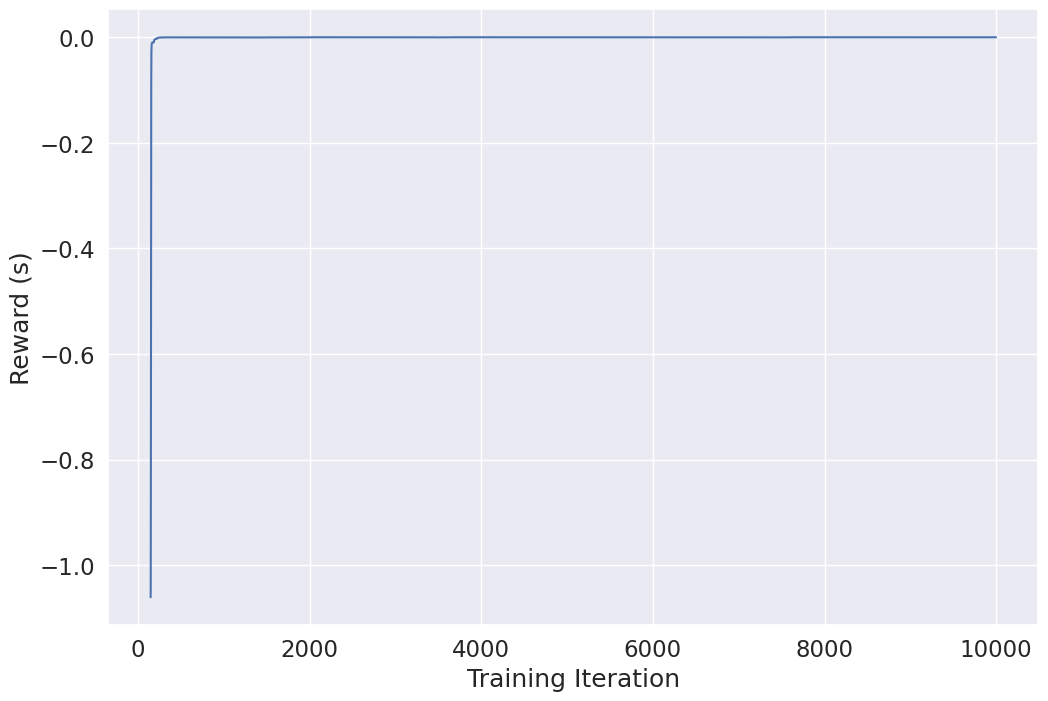

[-0.0278014  -4.39084158 -9.8037529  ...  0.          0.
  0.        ]


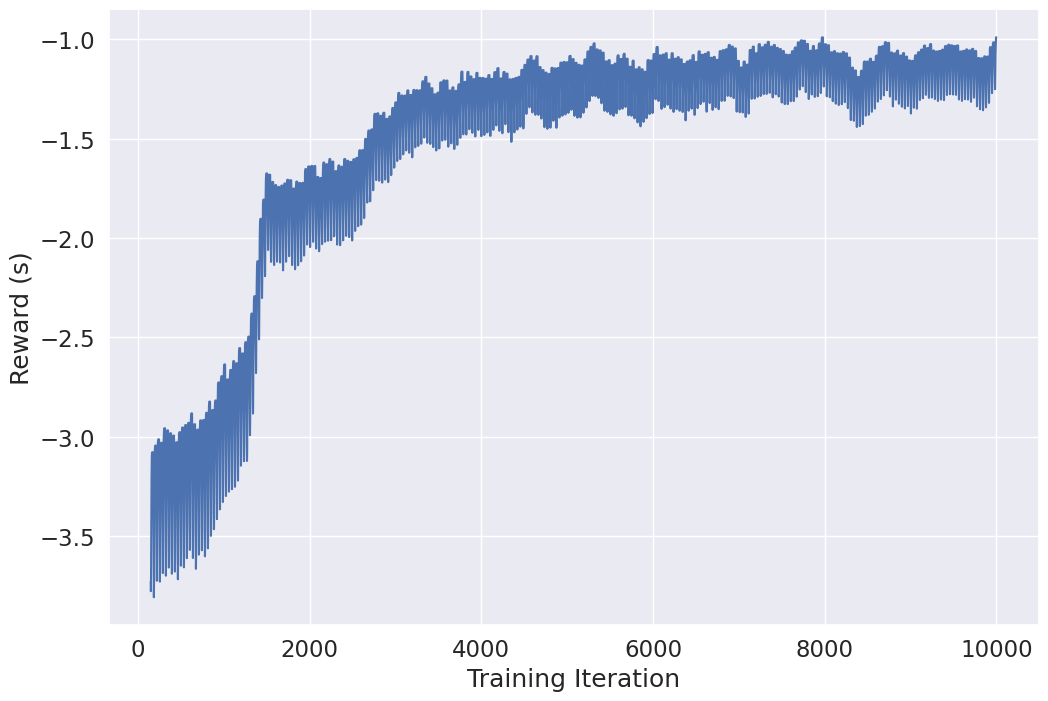

[-228.99719238 -350.0762085  -432.02912598 ...    0.            0.
    0.        ]


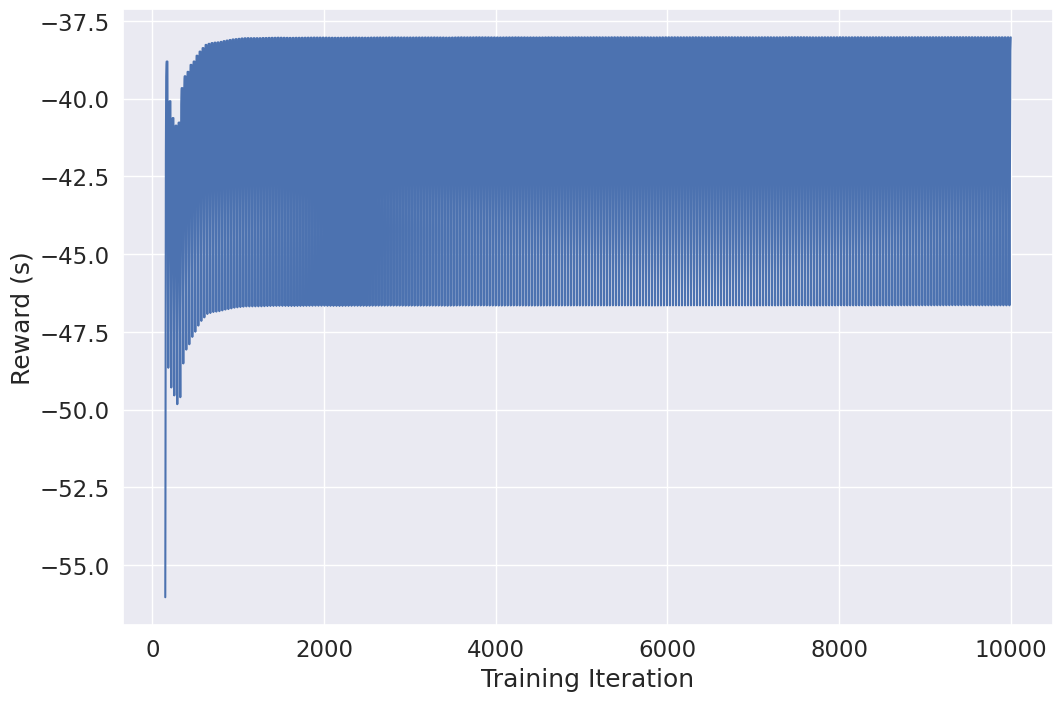

[-25.94922218 -46.41318436 -70.3875061  ...   0.           0.
   0.        ]


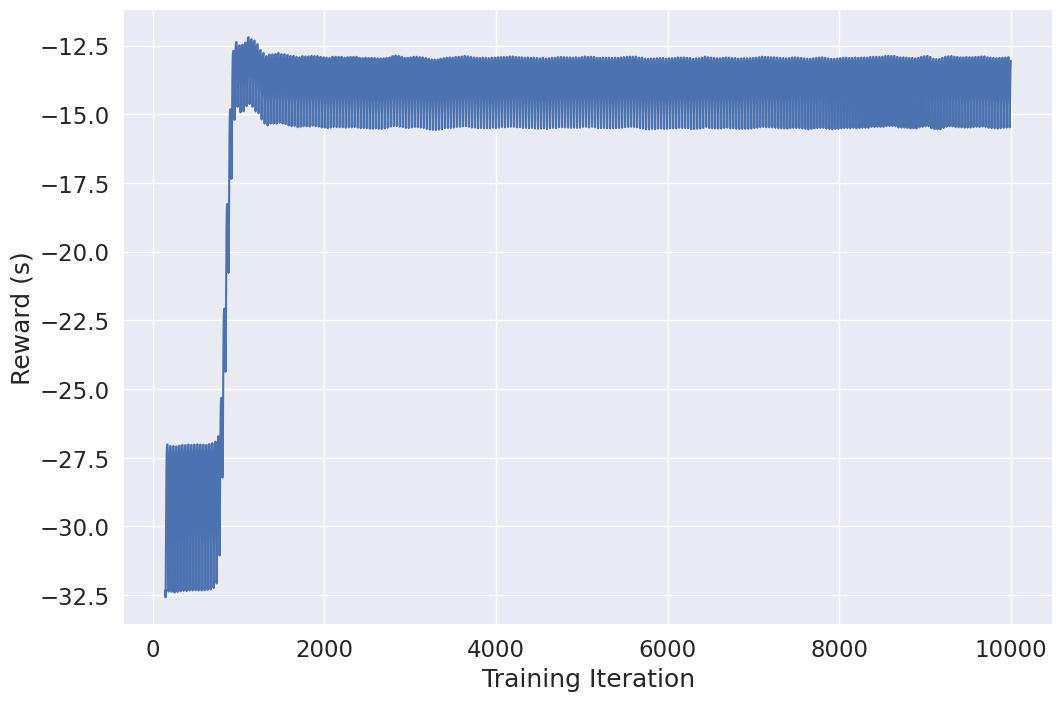

[-11.10852165 -21.79894791 -30.37343521 ...   0.           0.
   0.        ]


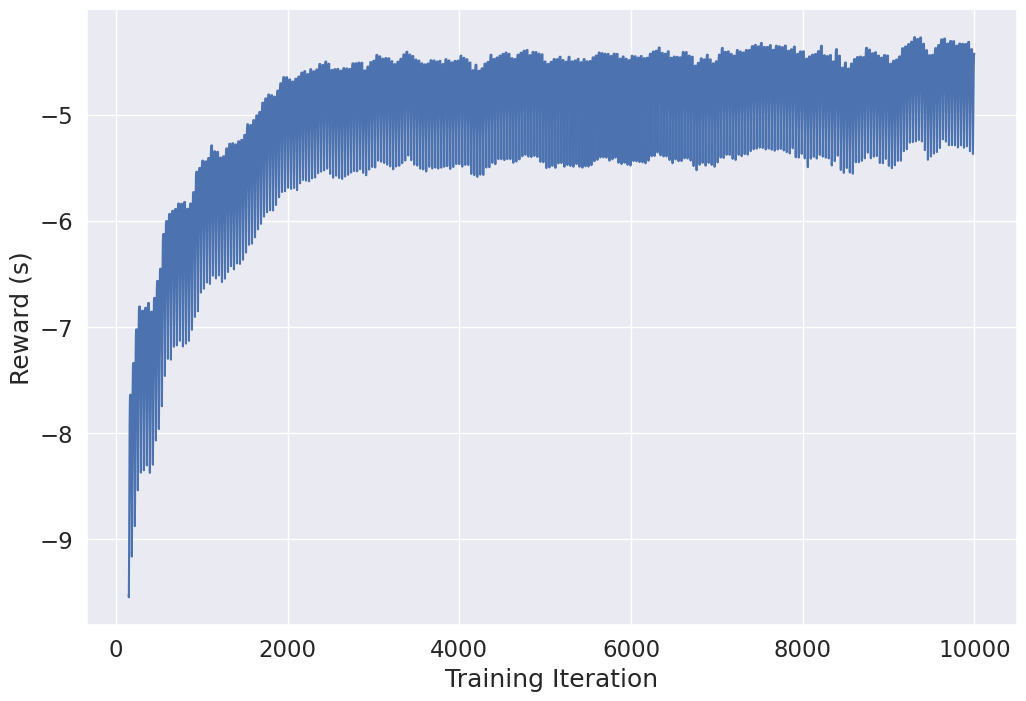

[ -0.19981627  -7.01158552 -11.41176662 ...   0.           0.
   0.        ]


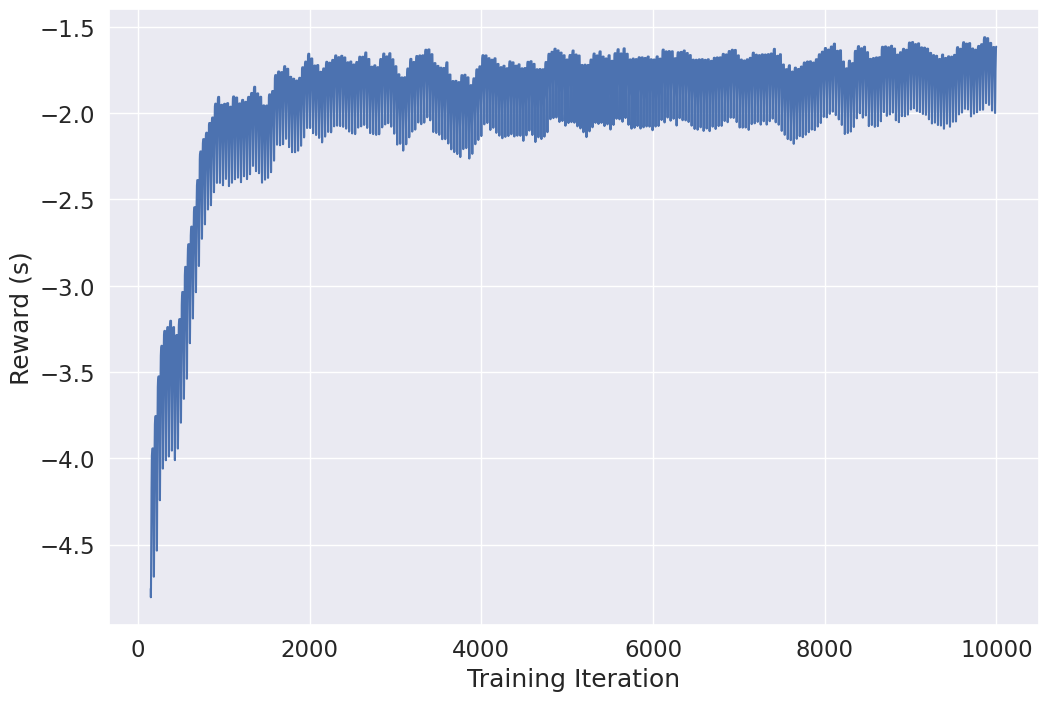

In [11]:
list_of_results = ['noise_00_energy_10_separation_00', 'noise_00_energy_00_separation_10', 'noise_10_energy_00_separation_00', 'noise_01_energy_09_separation_00', 'noise_005_energy_00_separation_095', 'noise_00_energy_005_separation_095']

for result_set in list_of_results:
    reward_no_tm = np.load(f"results/train_D2MAV_full_results/{result_set}/reward.npy", allow_pickle=True)
    # nmac_no_tm = np.load(f"results/train_D2MAV_noise_aware_temp_test_01_09_01/{metric}.npy")
    # iterations_no_tm = np.load("results/train_D2MAV_noise_aware_temp_test_01_09_01/iteration_record.npy")
    fig = plt.figure(figsize=(12,8))
    print(reward_no_tm)
    sns.set(font_scale = 1.5)

    # nmac_no_tm = pd.DataFrame(nmac_no_tm)
    reward_no_tm = pd.DataFrame(reward_no_tm)

    RM = 150


    plt.plot(reward_no_tm.rolling(RM).mean())

    plt.xlabel('Training Iteration')
    plt.ylabel('Reward (s)')
    tikzplotlib.save(f"plot_results/tex_plot_training_curves/{result_set}.tex")
    plt.savefig(f"plot_results/tex_plot_training_curves/{result_set}.png")
    plt.show()

1.86
100
Entropy of the distribution: 2.2820


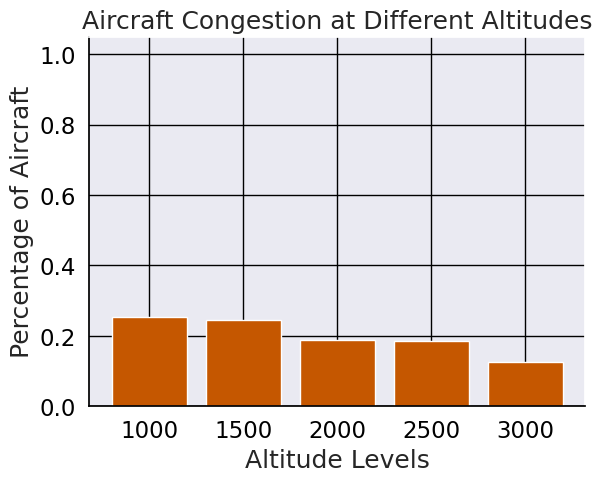

1.63
100
Entropy of the distribution: 1.1536


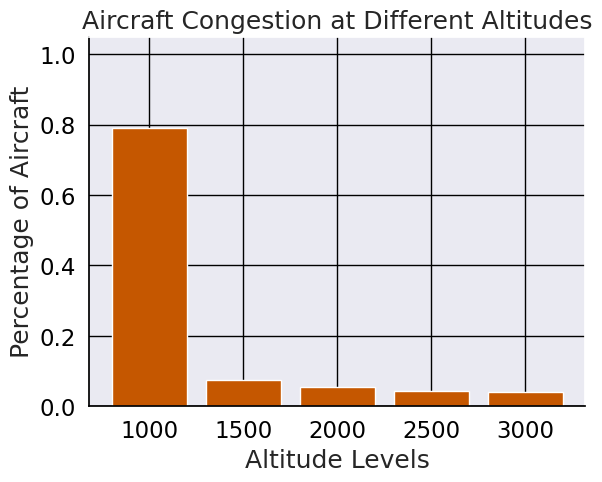

1.86
100
Entropy of the distribution: 1.1719


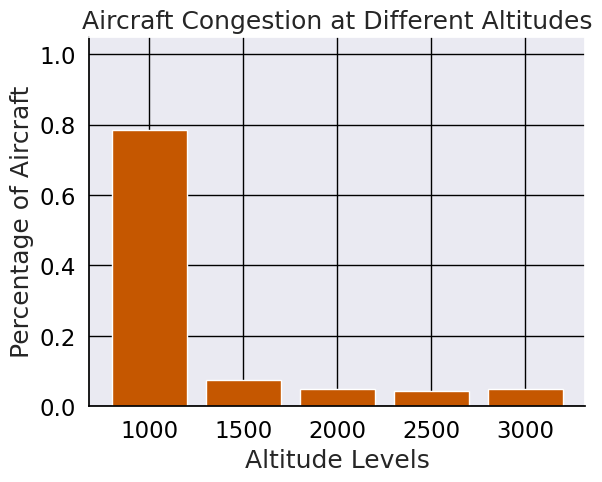

2.4
100
Entropy of the distribution: 0.8969


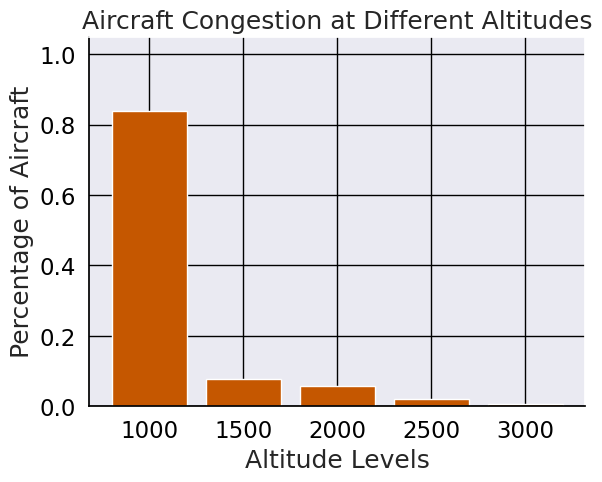

1.28
100
Entropy of the distribution: 1.0890


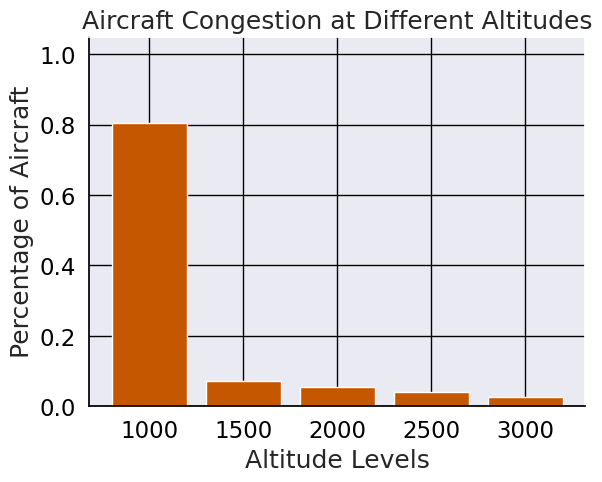

2.2
100
Entropy of the distribution: 0.9168


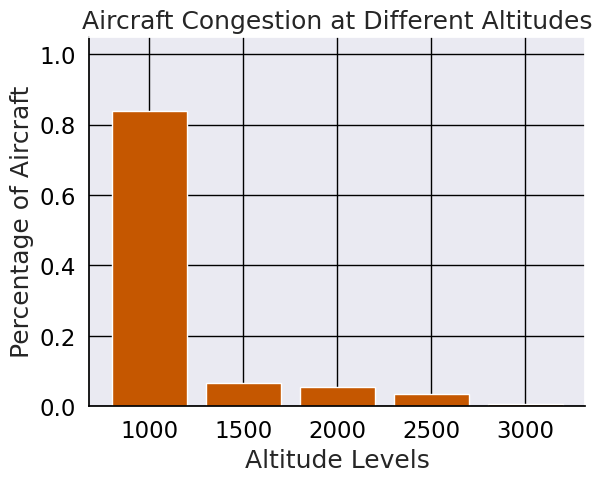

17.84
100
Entropy of the distribution: 0.0497


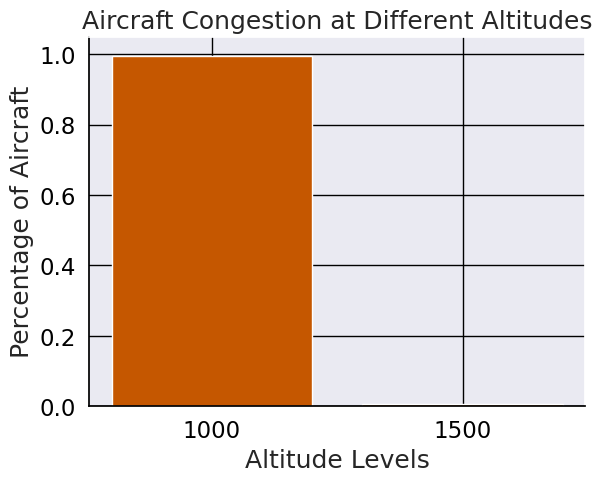

17.9
100
Entropy of the distribution: 0.0381


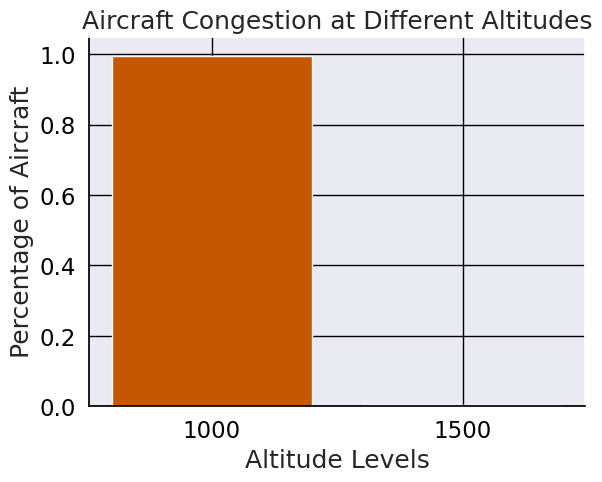

17.9
100
Entropy of the distribution: 0.0512


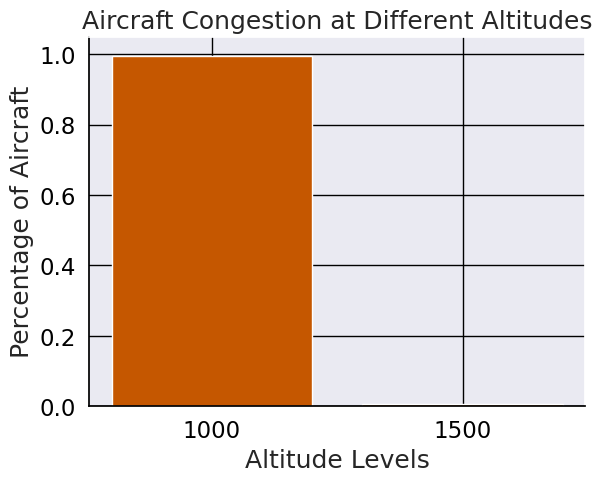

17.928571428571427
56
Entropy of the distribution: 0.0119


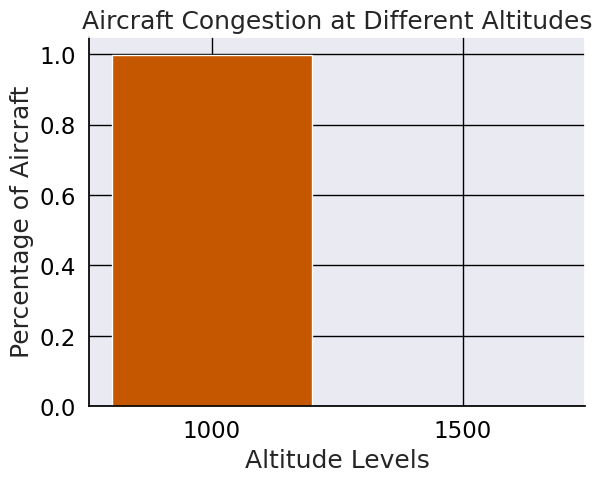

In [12]:
# Complexity of Air-Traffic Flow

import matplotlib.pyplot as plt
import tikzplotlib
import json
dict_of_data_points = {'noise_00_energy_00_separation_10': 0.0, 'noise_00_energy_005_separation_095':0.05, 'noise_00_energy_01_separation_09':0.1, 'noise_00_energy_015_separation_085':0.15, 'noise_00_energy_02_separation_08':0.2, 'noise_00_energy_025_separation_075':0.25, 'noise_00_energy_03_separation_07':0.3, 'noise_00_energy_035_separation_065':0.35, 'noise_00_energy_04_separation_06':0.4, 'noise_00_energy_045_separation_055':0.45}
for log_string in dict_of_data_points.keys():
# log_string = "noise_00_energy_00_separation_10"
    with open(f'log/test_models_full_results/{log_string}.json') as file:
        full_data = json.load(file)
    print(np.mean([full_data[i]['los'] for i in range (0, len(full_data))]))
    print(len(full_data))
    conjestion_data = full_data[0]['congestion_distribution']
    # Extract keys and counts
    del conjestion_data['0']
    del conjestion_data['80']
    keys = list(conjestion_data.keys())
    counts = list(conjestion_data.values())

    # Calculate probabilities
    total_count = sum(counts)
    probabilities = [count / total_count for count in counts]

    # Calculate entropy
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)

    # Print entropy
    print(f"Entropy of the distribution: {entropy:.4f}")

    # Create a bar plot
    # Calculate the total number of aircraft
    total_count = sum(counts)

    # Convert counts to percentages
    percentages = [(count / total_count) for count in counts]
    bar_color = (197 / 255, 87 / 255, 0 / 255)
    # Create a bar plot using percentages
    plt.bar(keys, percentages, color=bar_color)
    plt.grid(True, color='black')

    # Set the border (spines) color to black
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')

    # Set the tick labels to black
    plt.xticks(color='black')
    plt.yticks(color='black')

    plt.ylim(0, 1.05)

    # Add labels and title
    plt.xlabel('Altitude Levels')
    plt.ylabel('Percentage of Aircraft')
    plt.title('Aircraft Congestion at Different Altitudes')

    # # Save the plot with a transparent background and tight bounding box
    # plt.savefig('congestion_plot.png', transparent=True, bbox_inches='tight')

    # # Display the plot
    tikzplotlib.save(f"plot_results/tex_plots_energy_separation/{log_string}.tex")
    plt.show()



18.0
100
Entropy of the distribution: -0.0000


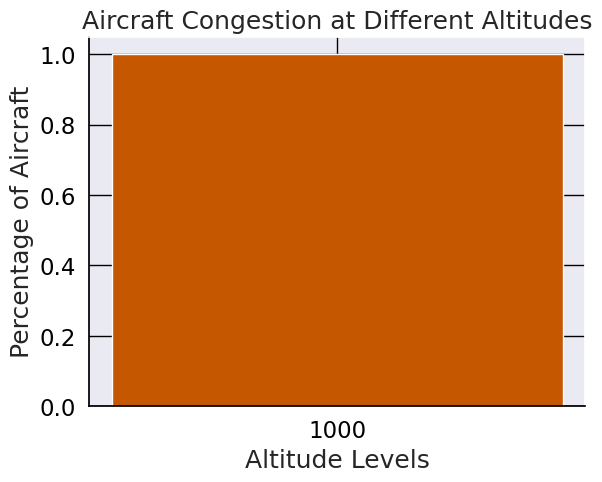

18.0
100
Entropy of the distribution: -0.0000


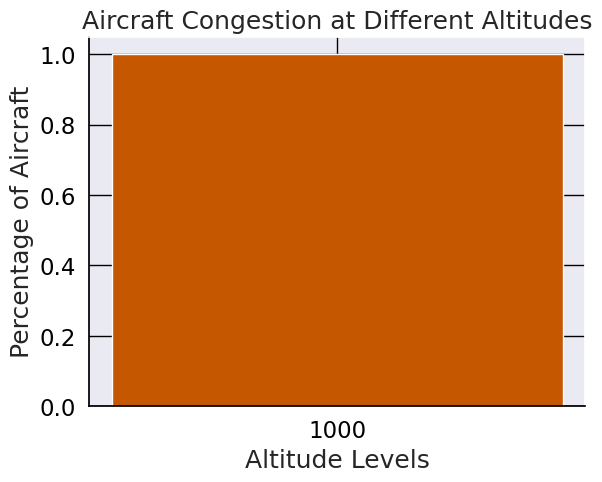

17.94
100
Entropy of the distribution: 0.0168


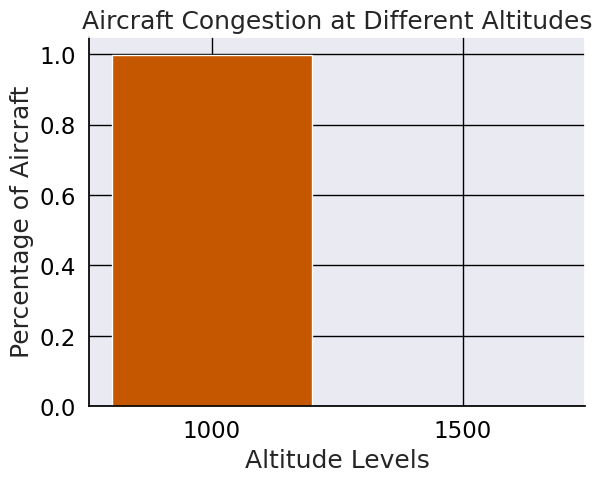

34.0
1
Entropy of the distribution: 0.6494


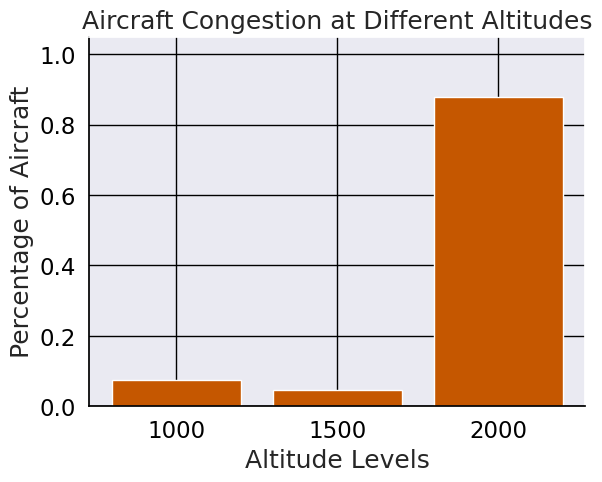

31.34
100
Entropy of the distribution: 1.0055


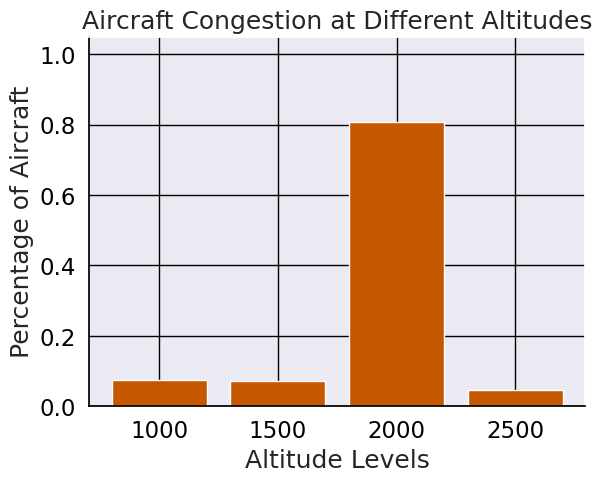

18.69
100
Entropy of the distribution: 1.6097


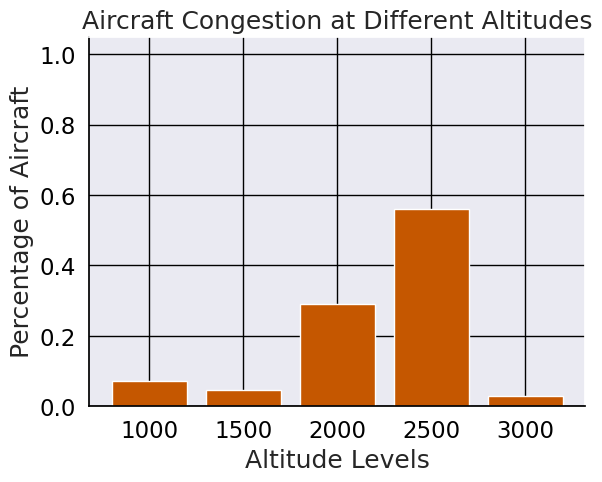

28.0
100
Entropy of the distribution: 1.0761


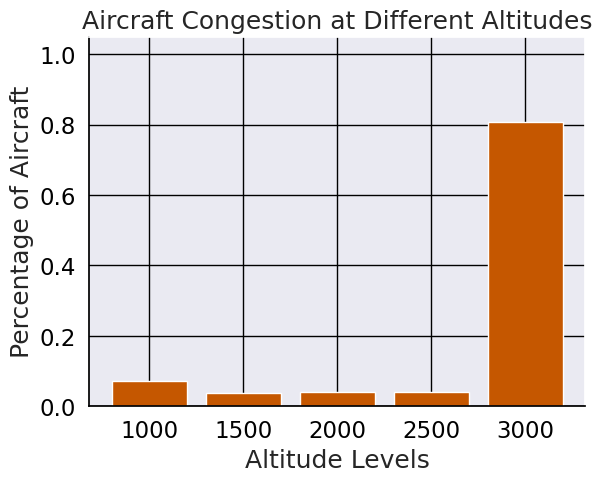

27.98
100
Entropy of the distribution: 1.0556


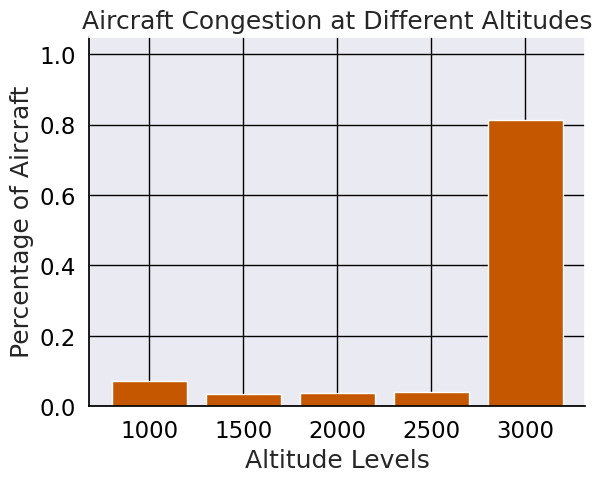

28.0
100
Entropy of the distribution: 1.0331


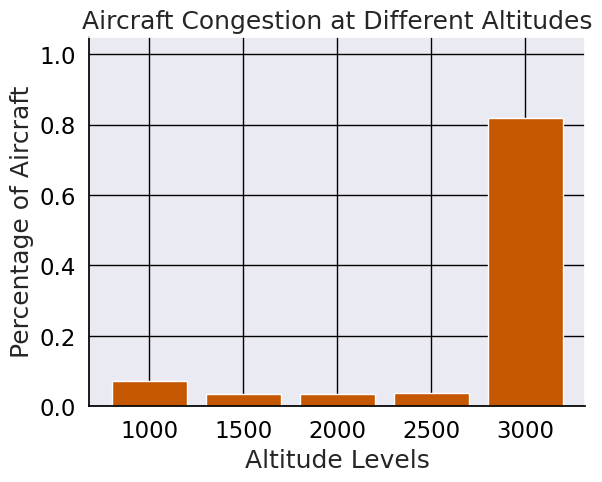

28.0
100
Entropy of the distribution: 1.0750


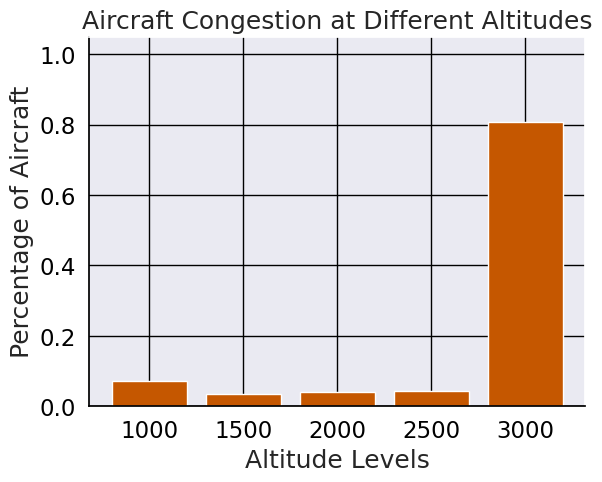

In [16]:
# Complexity of Air-Traffic Flow

import matplotlib.pyplot as plt
import tikzplotlib
import json
dict_of_data_points = {'noise_00_energy_10_separation_00': 0.0, 'noise_0025_energy_0975_separation_00': 0.025, 'noise_005_energy_095_separation_00' : 0.05, 'noise_0075_energy_0925_separation_00' : 0.075, 'noise_01_energy_09_separation_00': 0.1, 'noise_0125_energy_0875_separation_00' : 0.125, 'noise_015_energy_085_separation_00' : 0.15, 'noise_0175_energy_0825_separation_00' : 0.175, 'noise_02_energy_08_separation_00' : 0.2, 'noise_10_energy_00_separation_00' : 1.0} # 'noise_0175_energy_0825_separation_00' : 0.175 , 'noise_02_energy_08_separation_00' : 0.2, 'noise_03_energy_07_separation_00' : 0.3}
for log_string in dict_of_data_points.keys():
# log_string = "noise_00_energy_00_separation_10"
    with open(f'log/test_models_full_results/{log_string}.json') as file:
        full_data = json.load(file)
    print(np.mean([full_data[i]['los'] for i in range (0, len(full_data))]))
    print(len(full_data))
    conjestion_data = full_data[0]['congestion_distribution']
    # Extract keys and counts
    del conjestion_data['0']
    del conjestion_data['80']
    keys = list(conjestion_data.keys())
    counts = list(conjestion_data.values())

    # Calculate probabilities
    total_count = sum(counts)
    probabilities = [count / total_count for count in counts]

    # Calculate entropy
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)

    # Print entropy
    print(f"Entropy of the distribution: {entropy:.4f}")

    # Create a bar plot
    # Calculate the total number of aircraft
    total_count = sum(counts)

    # Convert counts to percentages
    percentages = [(count / total_count) for count in counts]
    bar_color = (197 / 255, 87 / 255, 0 / 255)
    # Create a bar plot using percentages
    plt.bar(keys, percentages, color=bar_color)
    plt.grid(True, color='black')

    # Set the border (spines) color to black
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')

    # Set the tick labels to black
    plt.xticks(color='black')
    plt.yticks(color='black')

    plt.ylim(0, 1.05)

    # Add labels and title
    plt.xlabel('Altitude Levels')
    plt.ylabel('Percentage of Aircraft')
    plt.title('Aircraft Congestion at Different Altitudes')

    # # Save the plot with a transparent background and tight bounding box
    # plt.savefig('congestion_plot.png', transparent=True, bbox_inches='tight')

    # # Display the plot
    tikzplotlib.save(f"plot_results/tex_plots_energy_noise/{log_string}.tex")
    plt.show()



1.86
100
Entropy of the distribution: 2.2820


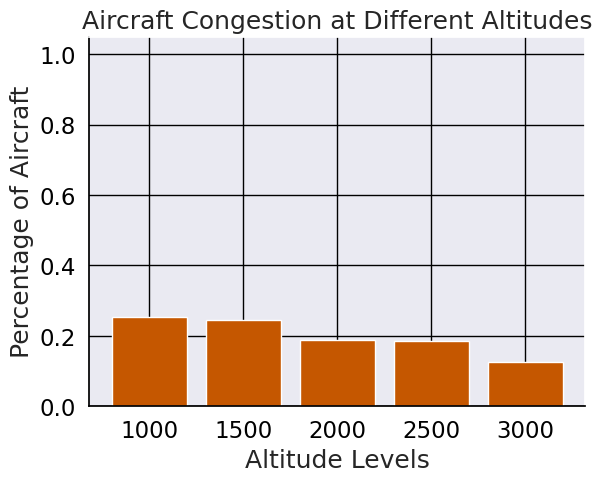

3.4
100
Entropy of the distribution: 1.5087


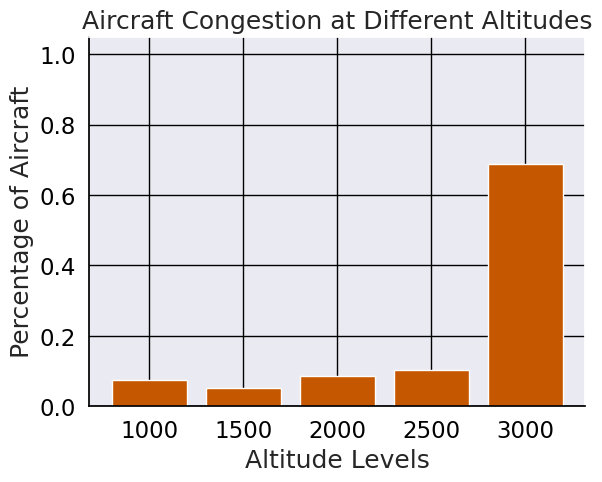

4.32
100
Entropy of the distribution: 1.3939


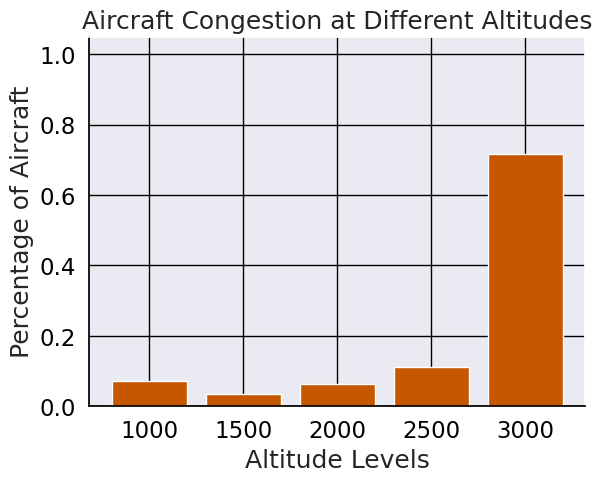

15.5
100
Entropy of the distribution: 1.2292


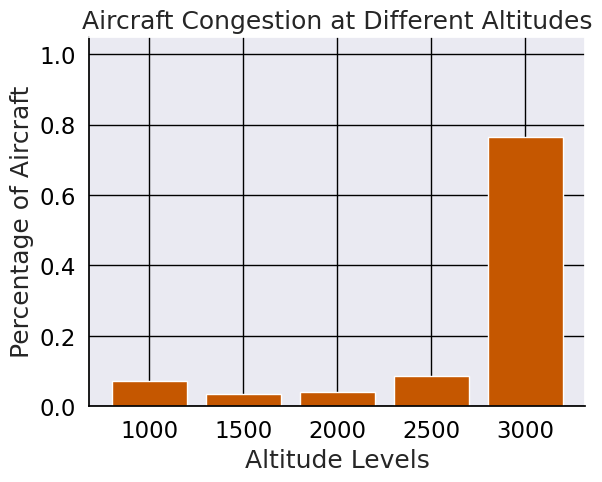

28.0
100
Entropy of the distribution: 1.0139


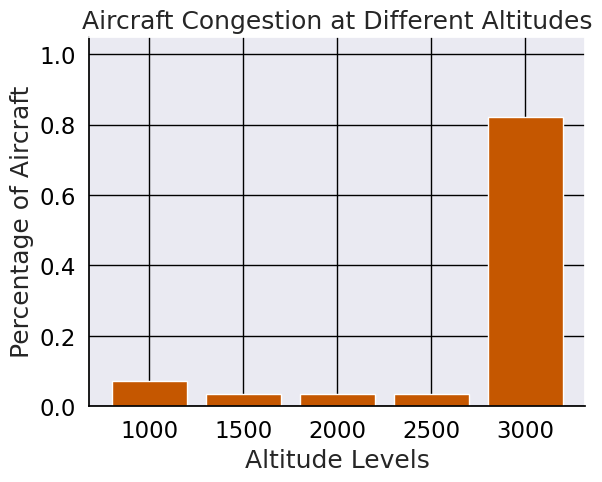

28.0
100
Entropy of the distribution: 1.0149


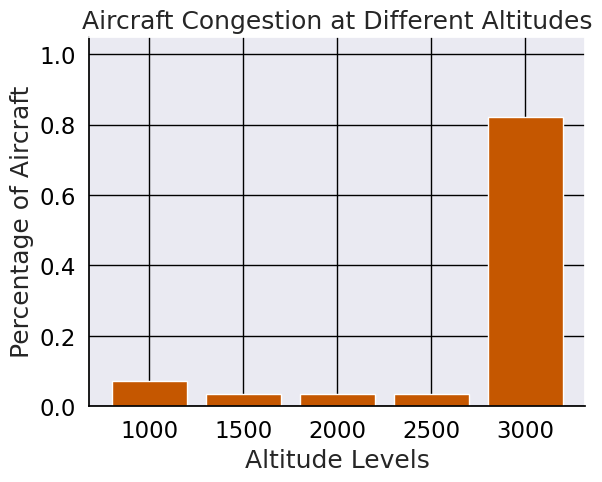

28.0
100
Entropy of the distribution: 1.0142


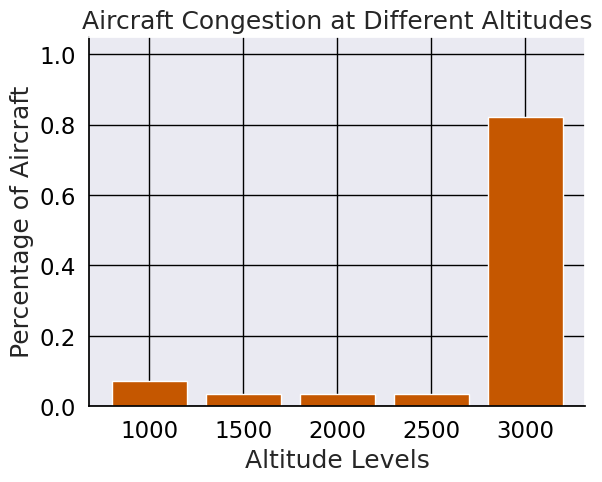

28.0
100
Entropy of the distribution: 1.0132


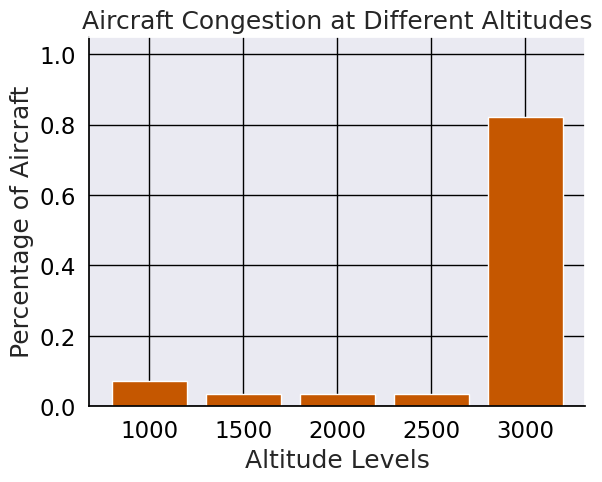

28.0
100
Entropy of the distribution: 1.0137


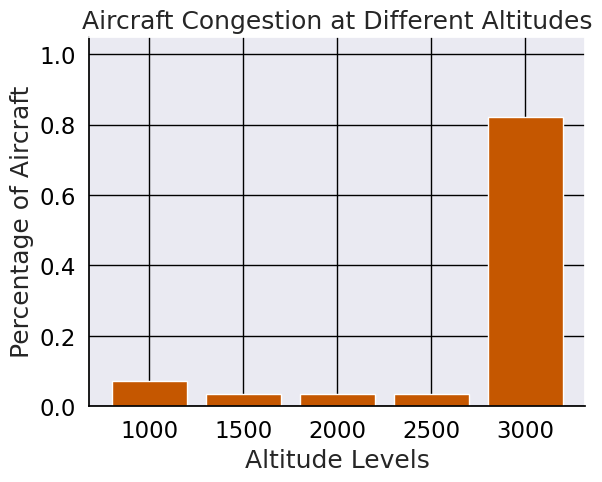

28.0
100
Entropy of the distribution: 1.0135


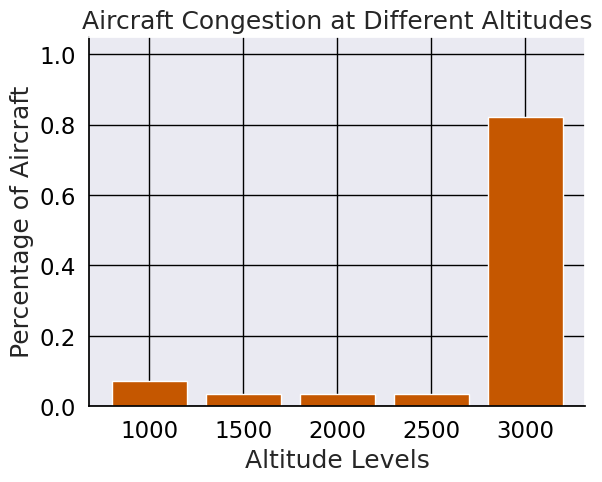

In [14]:
# Complexity of Air-Traffic Flow

import matplotlib.pyplot as plt
import tikzplotlib
import json
dict_of_data_points = {'noise_00_energy_00_separation_10': 0, 'noise_005_energy_00_separation_095': 0.05, 'noise_01_energy_00_separation_09': 0.1, 'noise_015_energy_00_separation_085': 0.15, 'noise_02_energy_00_separation_08': 0.2, 'noise_025_energy_00_separation_075': 0.25, 'noise_03_energy_00_separation_07': 0.3, 'noise_035_energy_00_separation_065': 0.35, 'noise_04_energy_00_separation_06': 0.4, 'noise_045_energy_00_separation_055': 0.45}
for log_string in dict_of_data_points.keys():
# log_string = "noise_00_energy_00_separation_10"
    with open(f'log/test_models_full_results/{log_string}.json') as file:
        full_data = json.load(file)
    print(np.mean([full_data[i]['los'] for i in range (0, len(full_data))]))
    print(len(full_data))
    conjestion_data = full_data[0]['congestion_distribution']
    # Extract keys and counts
    del conjestion_data['0']
    del conjestion_data['80']
    keys = list(conjestion_data.keys())
    counts = list(conjestion_data.values())

    # Calculate probabilities
    total_count = sum(counts)
    probabilities = [count / total_count for count in counts]

    # Calculate entropy
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)

    # Print entropy
    print(f"Entropy of the distribution: {entropy:.4f}")

    # Create a bar plot
    # Calculate the total number of aircraft
    total_count = sum(counts)

    # Convert counts to percentages
    percentages = [(count / total_count) for count in counts]
    bar_color = (197 / 255, 87 / 255, 0 / 255)
    # Create a bar plot using percentages
    plt.bar(keys, percentages, color=bar_color)
    plt.grid(True, color='black')

    # Set the border (spines) color to black
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')

    # Set the tick labels to black
    plt.xticks(color='black')
    plt.yticks(color='black')

    plt.ylim(0, 1.05)

    # Add labels and title
    plt.xlabel('Altitude Levels')
    plt.ylabel('Percentage of Aircraft')
    plt.title('Aircraft Congestion at Different Altitudes')

    # # Save the plot with a transparent background and tight bounding box
    # plt.savefig('congestion_plot.png', transparent=True, bbox_inches='tight')

    # # Display the plot
    tikzplotlib.save(f"plot_results/tex_plots_noise_separation/{log_string}.tex")
    plt.show()

